In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

import geopandas as gpd
from shapely.geometry import Point
import calendar

In [2]:
codes = [
    71321002, 29711002, 65261002, 55721002, 79781002, 69461002, 10461002, 94611002, 35611002,
    78431002, 92321002, 69811002, 78911002, 62281002, 68031002, 95411002, 87021002, 23411002,
    90711002, 92011002, 83411002, 59531002, 86611002, 81811002, 82211002, 57711002, 86221002,
    59621002, 72441002, 71391002, 36431002, 29521002, 77111002, 85271002, 52911002, 67531002,
    60211002, 69331002, 69911002, 91111002, 66211002, 94341002, 72281002, 72421002, 90811002,
    59911002, 61221002, 92211002, 92231002, 92241002, 99141002, 23711002, 37781002, 95711002,
    73191002, 58261002, 99261002, 78311002, 78631002, 74871002, 81661002, 78831002, 67321002,
    96511002, 59211002, 66711002, 95611002, 97411002, 32821002, 90211002, 68321002, 19511002,
    19531002, 77811002, 77841002, 78121002, 81631002, 79441002
]

url = 'http://voies-hydrauliques.wallonie.be/opencms//opencms/fr/hydro/Actuelle/crue/mesure.jsp?code={code}&pres=inv'

stationdata = {}

for code in tqdm(codes):
    res = requests.get(url.format(code=code)).content
    bsr = BeautifulSoup(res)
    data = {'Code': code}
    data.update({dt.text: dt.find_next_sibling().text.strip() for dt in bsr.find_all('dt')})
    stationdata[data['Station']] = data

  0%|          | 0/78 [00:00<?, ?it/s]

In [3]:
gdf = gpd.GeoDataFrame.from_dict(stationdata, orient='index')
gdf.geometry = [Point(float(row[4].split(',')[0]), float(row[4].split(',')[1])) for row in gdf.itertuples()]
gdf = gdf.set_crs('EPSG:31370')
gdf.index = np.arange(len(gdf))
gdf.columns = ['code', 'station', 'river', 'coordinates', 'area', 'geometry']
gdf['area'] = gdf['area'].str.split().str[0].astype(float)
gdf.drop('coordinates', axis=1, inplace=True)

gdf = gdf.to_crs('EPSG:4326')
gdf.to_file('../GIS/voies_hydrolique_locations.shp')

<AxesSubplot:>

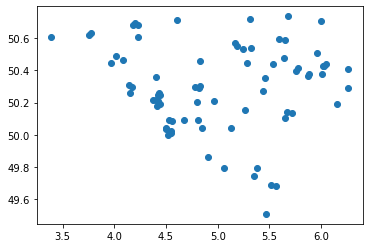

In [4]:
gdf.plot()

In [5]:
gdf.sort_values(by='area', ascending=False).head(30)

,code,station,river,area,geometry
0,71321002,AMAY,MEUSE MOYENNE,16416.0,POINT (5.31777 50.53648)
16,87021002,CHOOZ,HAUTE MEUSE,10120.0,POINT (4.80653 50.09213)
68,32821002,TOURNAI,ESCAUT,4922.0,POINT (3.39078 50.60851)
55,58261002,SAUHEID,OURTHE,2904.0,POINT (5.59117 50.59662)
54,73191002,SALZINNES Ronet,BASSE SAMBRE,2842.0,POINT (4.83291 50.45995)
64,59211002,TABREUX,OURTHE,1607.0,POINT (5.53511 50.43797)
24,82211002,GENDRON,LESSE,1286.0,POINT (4.96281 50.21133)
41,94341002,MEMBRE Pont,SEMOIS,1226.0,POINT (4.90201 49.86377)
21,59531002,DURBUY,OURTHE,1215.0,POINT (5.45550 50.35269)
59,74871002,SOLRE,HAUTE SAMBRE,1188.0,POINT (4.14117 50.30919)


In [6]:
stations = ['CHAUDFONTAINE','CHOOZ','GENDRON','HACCOURT','MARTINRIVE','MEMBRE-PONT','TABREUX','SAUHEID','SALZINNES Ronet','MOHA']
codes = ['62281002','87021002','82211002','57711002','66211002','94341002','59211002','58261002','73191002','72421002']

all_data = {}


In [7]:
for station, code in zip(stations, codes):
    
    if station in all_data:
        continue
#     print(f'Downloading data for station {station}')
    
    # Bepaal begin en eind tijdstip
    url = f'http://voies-hydrauliques.wallonie.be/opencms/opencms/fr/hydro/Archive/annuaires/stathorairetab.do?code={code}&annee=2020'
    html = requests.get(url).content
    df_list = pd.read_html(html)
    startendstr = df_list[10][2].values[0].split(':')[1].split('-')
    
    month, year = startendstr[0].split('/')
    start = datetime(int(year), int(month), 1)
    
    month, year = startendstr[1].split('/')
    end = datetime(int(year), int(month), calendar.monthrange(int(2010), int(month))[1])
    
    print(f'Data is available for {start}-{end}')
    
    years = np.arange(start.year, end.year+1, dtype=int)
    data = []
    for year in tqdm(years, desc=station):
        for month in [12]:
            startdate = datetime(year, month, 1)
            if startdate > datetime.now():
                continue
            
            url = f'http://voies-hydrauliques.wallonie.be/opencms/opencms/fr/hydro/Archive/annuaires/stathorairetab.do?code={code}&annee={int(startdate.year)}&mois={int(startdate.month)}'
            html = requests.get(url).content
            df_list = pd.read_html(html)
            # Create dataframe with days as rows and months as columns
            df = df_list[12].set_index('Unnamed: 0').iloc[:24]
            df.index = df.index.astype(int)
            discharges = df.unstack().dropna()
            
            td = timedelta(seconds=3600)
            datetimes = [datetime(year, month, int(day), int(hour-1)) + td for (day, hour) in discharges.index.to_list()]

            # Merge, only drop the NaN's after adding the dates
            data.append(pd.Series(index=datetimes, data=discharges.to_numpy()).dropna())
                
    # Concatenate all years
    station_data = pd.concat(data)
    station_data.index.names = ['date']
    
    # Add to station overview
    all_data[station] = station_data

Data is available for 1992-01-01 00:00:00-2022-06-30 00:00:00


CHAUDFONTAINE:   0%|          | 0/31 [00:00<?, ?it/s]

Data is available for 1990-01-01 00:00:00-2022-06-30 00:00:00


CHOOZ:   0%|          | 0/33 [00:00<?, ?it/s]

Data is available for 1968-01-01 00:00:00-2022-06-30 00:00:00


GENDRON:   0%|          | 0/55 [00:00<?, ?it/s]

Data is available for 1997-01-01 00:00:00-2022-06-30 00:00:00


HACCOURT:   0%|          | 0/26 [00:00<?, ?it/s]

Data is available for 1974-01-01 00:00:00-2022-06-30 00:00:00


MARTINRIVE:   0%|          | 0/49 [00:00<?, ?it/s]

Data is available for 1968-01-01 00:00:00-2022-06-30 00:00:00


MEMBRE-PONT:   0%|          | 0/55 [00:00<?, ?it/s]

Data is available for 1988-01-01 00:00:00-2022-06-30 00:00:00


TABREUX:   0%|          | 0/35 [00:00<?, ?it/s]

Data is available for 1987-01-01 00:00:00-2022-06-30 00:00:00


SAUHEID:   0%|          | 0/36 [00:00<?, ?it/s]

Data is available for 2007-01-01 00:00:00-2022-06-30 00:00:00


SALZINNES Ronet:   0%|          | 0/16 [00:00<?, ?it/s]

Data is available for 1974-01-01 00:00:00-2022-06-30 00:00:00


MOHA:   0%|          | 0/49 [00:00<?, ?it/s]

In [16]:
savepath = '../Data/Metingen/voies_hydrolique_hourly.csv'
already_available = pd.read_csv(savepath, sep=';', index_col=[0])

In [30]:
total = pd.concat([pd.DataFrame(all_data), already_available], ignore_index=False)
total.index = pd.to_datetime(total.index)
total.sort_index(inplace=True)

In [34]:
total.to_csv(savepath, sep=';')

<AxesSubplot:xlabel='date'>

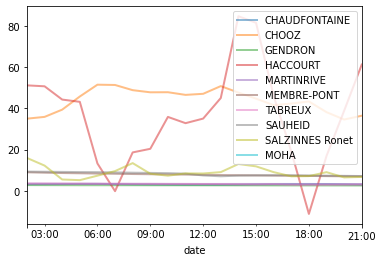

In [13]:
pd.DataFrame(all_data).iloc[-40:-20].plot(alpha=0.5, lw=2)